<a href="https://colab.research.google.com/github/ILYSHI/Neuronets/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Импорт данных

In [ ]:
import torchvision.datasets
MNIST_train  = torchvision.datasets.MNIST('./',download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./',download = True, train = False)

HTTPError: ignored

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

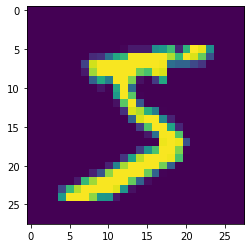

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0,:,:])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape([-1,28*28])

In [ ]:
X_train.shape

torch.Size([60000, 784])

In [ ]:
X_test.shape

torch.Size([10000, 784])

# Задание нейросети

In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet,self).__init__()
    self.fc1 = torch.nn.Linear(X_train.shape[1], n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    # self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
    # self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons,10)
    # self.sm = torch.nn.Softmax(dim=1)
  def forward(self,x):
    x = self.fc1(x)
    x = self.act1(x)
    # x = self.fc2(x)
    # x = self.act2(x)
    x = self.fc3(x)
    return x 
  # def inference(self,x):
  #   x = self.forward(x)
  #   x = self.sm(x)
  #   return x

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda:0')

In [ ]:
!nvidia-smi

Mon Jan 25 16:12:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    29W /  70W |   4149MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
mnist_net = MNISTNet(100)

In [ ]:
mnist_net = mnist_net.to(device)

In [ ]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 1000

In [ ]:
test_accuracy_history = []
test_loss_history = []

In [ ]:
len(test_accuracy_history)

0

In [ ]:
test_accuracy_history_SGD = []
test_loss_history_SGD = []

In [ ]:
for epoch in range(80):
  order = np.random.permutation(len(X_train))
  for start_index in range(0,len(X_train),batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]
    x_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    preds = mnist_net.forward(x_batch)
    loss_val = loss(preds,y_batch)
    loss_val.backward()
    optimizer.step()
  if epoch % 1 == 0:
    test_preds = mnist_net.forward(X_test)
    
    test_loss_history.append(loss(test_preds,y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    
    test_accuracy_history.append(accuracy)

    print(accuracy)
    # if (test_preds == y_test).float().mean()>=0.98:
    #   break


tensor(0.8874, device='cuda:0')
tensor(0.9130, device='cuda:0')
tensor(0.9211, device='cuda:0')
tensor(0.9264, device='cuda:0')
tensor(0.9310, device='cuda:0')
tensor(0.9331, device='cuda:0')
tensor(0.9391, device='cuda:0')
tensor(0.9363, device='cuda:0')
tensor(0.9418, device='cuda:0')
tensor(0.9400, device='cuda:0')
tensor(0.9420, device='cuda:0')
tensor(0.9443, device='cuda:0')
tensor(0.9463, device='cuda:0')
tensor(0.9451, device='cuda:0')
tensor(0.9481, device='cuda:0')
tensor(0.9502, device='cuda:0')
tensor(0.9492, device='cuda:0')
tensor(0.9519, device='cuda:0')
tensor(0.9516, device='cuda:0')
tensor(0.9516, device='cuda:0')
tensor(0.9553, device='cuda:0')
tensor(0.9520, device='cuda:0')
tensor(0.9536, device='cuda:0')
tensor(0.9536, device='cuda:0')
tensor(0.9540, device='cuda:0')
tensor(0.9533, device='cuda:0')
tensor(0.9557, device='cuda:0')
tensor(0.9578, device='cuda:0')
tensor(0.9538, device='cuda:0')
tensor(0.9560, device='cuda:0')
tensor(0.9594, device='cuda:0')
tensor(0

Text(0.5, 1.0, 'Loss-val')

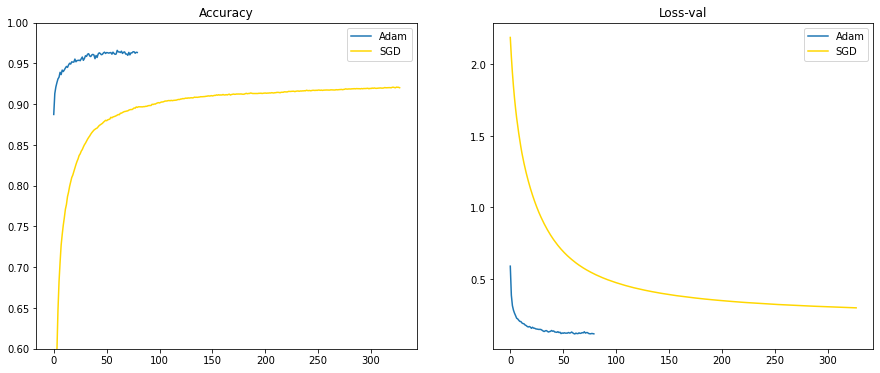

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(test_accuracy_history,label='Adam')
plt.plot(test_accuracy_history_SGD,c='gold',label='SGD')
plt.ylim([0.6,1])
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(test_loss_history,label='Adam')
plt.plot(test_loss_history_SGD, c = 'gold',label='SGD')
plt.legend()
plt.title('Loss-val')